In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import graphviz
from IPython import display

from sklearn import linear_model, preprocessing, tree, model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


In [11]:
loan_df=pd.read_csv("C:/Users/Usuario/Anaconda3/Tavo/LoanModel/LoanModel.csv")
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                   5000 non-null int64
Age                  5000 non-null int64
Experience           5000 non-null int64
Income               5000 non-null int64
ZIPCode              5000 non-null int64
Family               5000 non-null int64
CCAvg                5000 non-null float64
Education            5000 non-null int64
Mortgage             5000 non-null int64
PersonalLoan         5000 non-null int64
SecuritiesAccount    5000 non-null int64
CDAccount            5000 non-null int64
Online               5000 non-null int64
CreditCard           5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [3]:
loan_df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
print(loan_df.PersonalLoan.value_counts(normalize=True))

0    0.904
1    0.096
Name: PersonalLoan, dtype: float64


In [5]:
#print("Age",loan_df.groupby(['PersonalLoan'])['Age'].describe())
#print("Experience",loan_df.groupby(['PersonalLoan'])['Experience'].describe())
#print("Income",loan_df.groupby(['PersonalLoan'])['Income'].describe())
#print("Family Members",loan_df.groupby(['PersonalLoan'])['Family'].describe())
#print("CC Avg Spending",loan_df.groupby(['PersonalLoan'])['CCAvg'].describe())
#print("Education",loan_df.groupby(['PersonalLoan'])['Education'].describe())
#print("Mortgage",loan_df.groupby(['PersonalLoan'])['Mortgage'].describe())
#print("SecuritiesAccount",loan_df.groupby(['PersonalLoan'])['SecuritiesAccount'].describe())
#print("CDAccount",loan_df.groupby(['PersonalLoan'])['CDAccount'].describe())
#print("Online",loan_df.groupby(['PersonalLoan'])['Online'].describe())
#print("CreditCard",loan_df.groupby(['PersonalLoan'])['CreditCard'].describe())

In [6]:
#for x in [0,1]:
#    loan_df.Age[loan_df.PersonalLoan==x].plot(kind='kde')
#plt.title("Loan by age")
#plt.legend(('No Loan','Loan'))
#plt.show()
#for x in [0,1]:
#    loan_df.Experience[loan_df.PersonalLoan==x].plot(kind='kde')
#plt.title("Loan by Experience")
#plt.legend(('No Loan','Loan'))
#plt.show()
#for x in [0,1]:
#    loan_df.Income[loan_df.PersonalLoan==x].plot(kind='kde')
#plt.title("Loan by Income")
#plt.legend(('No Loan','Loan'))
#plt.show()
#for x in [0,1]:
#    loan_df.Family[loan_df.PersonalLoan==x].plot(kind='kde')
#plt.title("Loan by Family")
#plt.legend(('No Loan','Loan'))
#plt.show()
#for x in [0,1]:
#    loan_df.CCAvg[loan_df.PersonalLoan==x].plot(kind='kde')
#plt.title("Loan by CC Avg Spending")
#plt.legend(('No Loan','Loan'))
#plt.show()
#for x in [0,1]:
#    loan_df.Education[loan_df.PersonalLoan==x].plot(kind='kde')
#plt.title("Loan by Education")
#plt.legend(('No Loan','Loan'))
#plt.show()
#for x in [0,1]:
#    loan_df.Mortgage[loan_df.PersonalLoan==x].plot(kind='kde')
#plt.title("Loan by Mortgage")
#plt.legend(('No Loan','Loan'))
#plt.show()
#for x in [0,1]:
#    loan_df.SecuritiesAccount[loan_df.PersonalLoan==x].plot(kind='kde')
#plt.title("Loan by Securities Account")
#plt.legend(('No Loan','Loan'))
#plt.show()
#for x in [0,1]:
#    loan_df.CDAccount[loan_df.PersonalLoan==x].plot(kind='kde')
#plt.title("Loan by CDAccount")
#plt.legend(('No Loan','Loan'))
#plt.show()
#for x in [0,1]:
#    loan_df.Online[loan_df.PersonalLoan==x].plot(kind='kde')
#plt.title("Loan by Onliny Usage")
#plt.legend(('No Loan','Loan'))
#plt.show()
#for x in [0,1]:
#    loan_df.CreditCard[loan_df.PersonalLoan==x].plot(kind='kde')
#plt.title("Loan by CreditCard")
#plt.legend(('No Loan','Loan'))
#plt.show()

In [12]:
train_features_names = ["Age", "Experience", "Income", "Family", "CCAvg", "Education", "Mortgage", "SecuritiesAccount", "CDAccount", "CDAccount", "CreditCard"]
training_target = loan_df["PersonalLoan"].values
training_features = loan_df[train_features_names].values

[[904   2]
 [ 16  78]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       906
           1       0.97      0.83      0.90        94

    accuracy                           0.98      1000
   macro avg       0.98      0.91      0.94      1000
weighted avg       0.98      0.98      0.98      1000

Decision tree score: 0.9834
Cross Validation of decision tree: 0.9832095238095241


'LoanTrees.pdf'

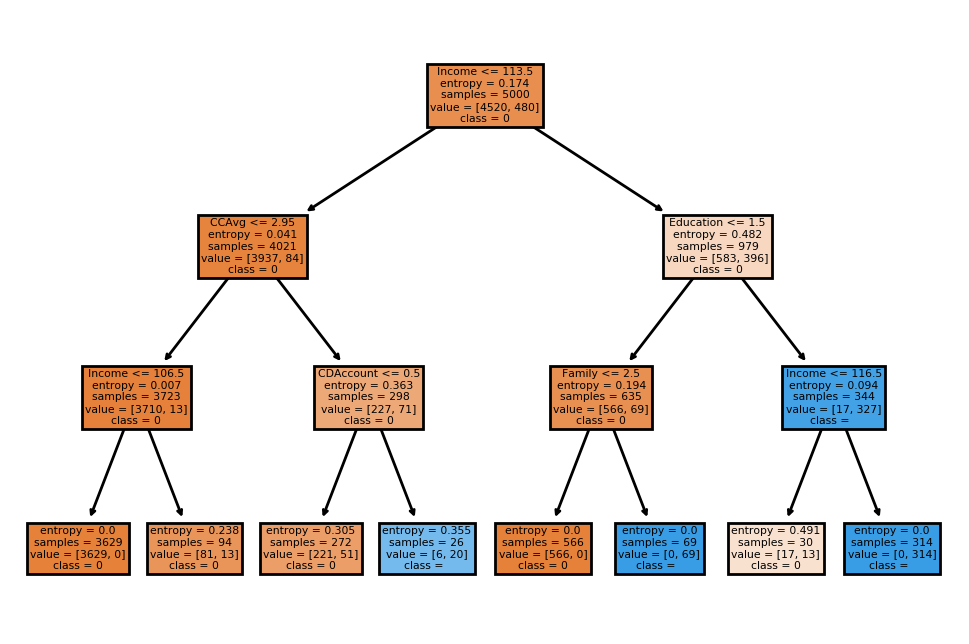

In [40]:
MLalgotree = tree.DecisionTreeClassifier(random_state=1,max_depth=3, min_samples_split=2)
MLmodeltree = MLalgotree.fit(training_features, training_target)

train_test_split(training_features, training_target, test_size=0.20)
x_train, x_test, y_train, y_test = train_test_split(training_features, training_target, test_size=0.20)
predic = MLalgotree.predict(x_test)
print(confusion_matrix(y_test, predic))
print(classification_report(y_test, predic))

print("Decision tree score:", MLmodeltree.score(training_features, training_target))
scorestree = model_selection.cross_val_score(MLalgotree, training_features, training_target, scoring="accuracy", cv=100)
print("Cross Validation of decision tree:", scorestree.mean())


plt.rcParams['figure.dpi'] = 200
tree.plot_tree(MLmodeltree, filled=True, feature_names=train_features_names, class_names=str(loan_df.PersonalLoan))
dot_data = tree.export_graphviz(MLalgotree, out_file=None, feature_names=train_features_names, class_names=str(loan_df.PersonalLoan)) 
graph = graphviz.Source(dot_data) 
graph.render("LoanTrees") 


In [35]:
MLalgotree2 = RandomForestClassifier(max_depth=3, n_estimators=10)
MLmodeltree2 = MLalgotree2.fit(training_features, training_target)
print("Decision tree score:", MLmodeltree2.score(training_features, training_target))
scorestree = model_selection.cross_val_score(MLalgotree2, training_features, training_target, scoring="accuracy", cv=100)
print("Cross Validation of decision tree:", scorestree.mean())
estimator = MLmodeltree2.estimators_[5]
#plt.rcParams['figure.dpi'] = 200
#tree.plot_tree(MLmodeltree2, filled=True, feature_names=train_features_names)
str_tree = tree.export_graphviz(estimator, out_file=None, 
                feature_names = train_features_names,
                class_names=str(loan_df.PersonalLoan),
                rounded = True, proportion = False, 
                precision = 2, filled = True)
graph = graphviz.Source(str_tree) 
graph.render("LoanTrees2") 

Decision tree score: 0.9618
Cross Validation of decision tree: 0.9470034413765507


'LoanTrees2.pdf'